In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading in the data
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [3]:
#exploring the dataframe
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
#renaming the columns to simplify the dataframe
df.columns = ['Signal','Density']
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


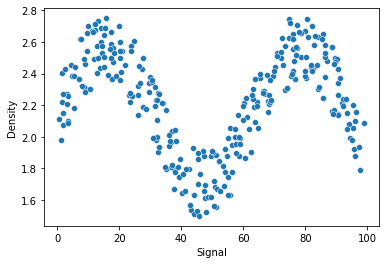

In [5]:
#Creating a scatterplot to explore the data
sns.scatterplot(x='Signal',y='Density',data=df);

In [6]:
# Separating out the explanatory and dependant variables
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Performing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
#Creating an instance of Linear Regression Model
lr_model = LinearRegression()

In [12]:
#fitting the training data to our model
lr_model.fit(X_train,y_train)

LinearRegression()

In [13]:
#calculating predictions
lr_preds = lr_model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
#Evaluating the performance of our model
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [16]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.25700519965846297

In [17]:
#creating a range of signals to plot out the predictions
signal_range = np.arange(0,100)

In [18]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

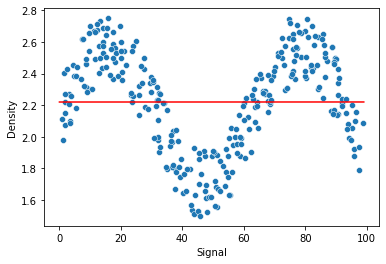

In [19]:
#Plotting the predictions of a sample range over the data
sns.scatterplot(x='Signal',y='Density',data=df);
plt.plot(signal_range,signal_preds,'red');

In [53]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure()
    sns.scatterplot(x='Signal',y='Density',data=df)
    plt.plot(signal_range,signal_preds,color='red')

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [31]:
#Creating a pipeline for polynomial regression
pipe = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())

RMSE : 0.28173095637255463


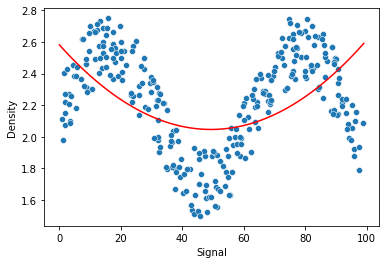

In [32]:
# Second degree polynomial regression
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14588633387737873


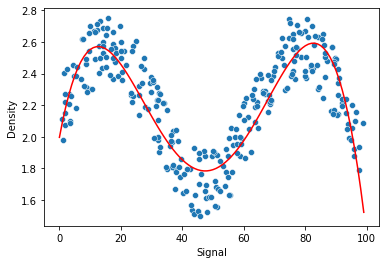

In [33]:
# 4th degree polynomial regression
pipe = make_pipeline(PolynomialFeatures(degree=4),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

In [34]:
# K nearest neighbors regression
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.15234870286353372
RMSE : 0.13730685016923655
RMSE : 0.13277855732740926


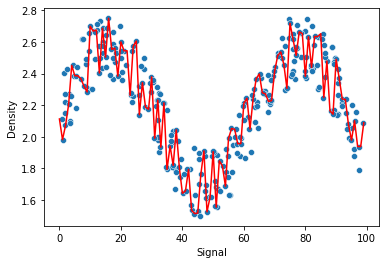

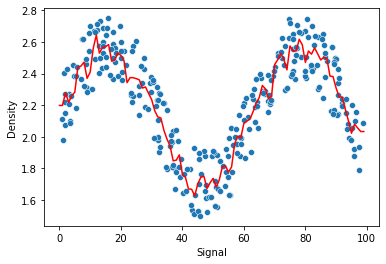

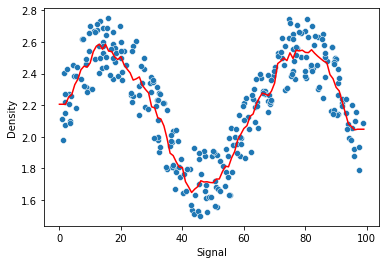

In [54]:
# testing out a bunch of k values
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

In [36]:
from sklearn.tree import DecisionTreeRegressor

RMSE : 0.15234870286353372


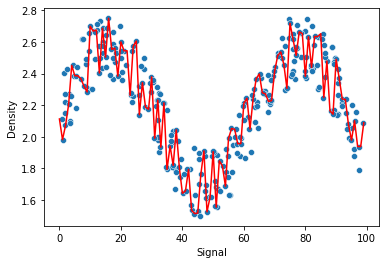

In [37]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [38]:
from sklearn.svm import SVR

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
svr = SVR()
param_grid = {'C':[0.01,.1,1,5,10,100],
             'gamma':['auto','scale']}

svm_grid = GridSearchCV(svr,param_grid)

RMSE : 0.13015742723602505


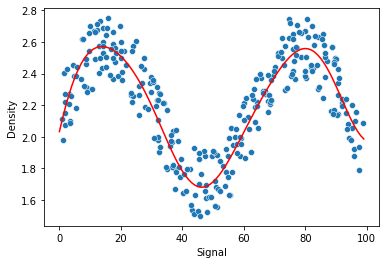

In [41]:
run_model(svm_grid,X_train,y_train,X_test,y_test)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE : 0.13339986251779037


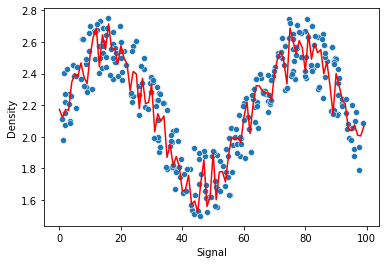

In [44]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

RMSE : 0.13228047134955814


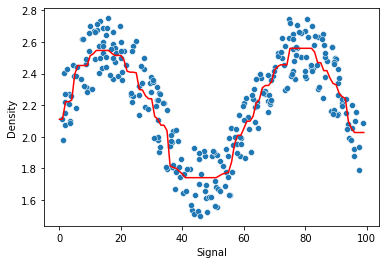

In [55]:
   
model = AdaBoostRegressor()

run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.13294148649584667


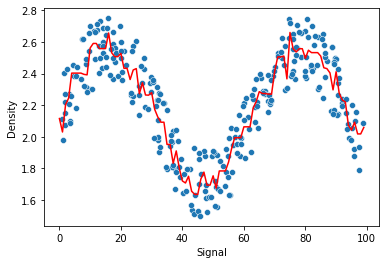

In [47]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)